In [54]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(r"D:\system\桌面\lcm-code\tokenizers_lcm\tokenizer_gpt100.json")



In [58]:
print(tokenizer.encode('CCC(=O)O'))

[73, 69, 33, 3, 33]


In [51]:
from nltk.translate.bleu_score import sentence_bleu

# 预测序列
predicted_sequence = [1, 2, 3, 4, 5]
# 标签序列
reference_sequence = [1, 2, 3, 4, 5]

# 计算 BLEU 分数
bleu_score = sentence_bleu([reference_sequence], predicted_sequence)

print("BLEU 分数:", bleu_score)


BLEU 分数: 1.0


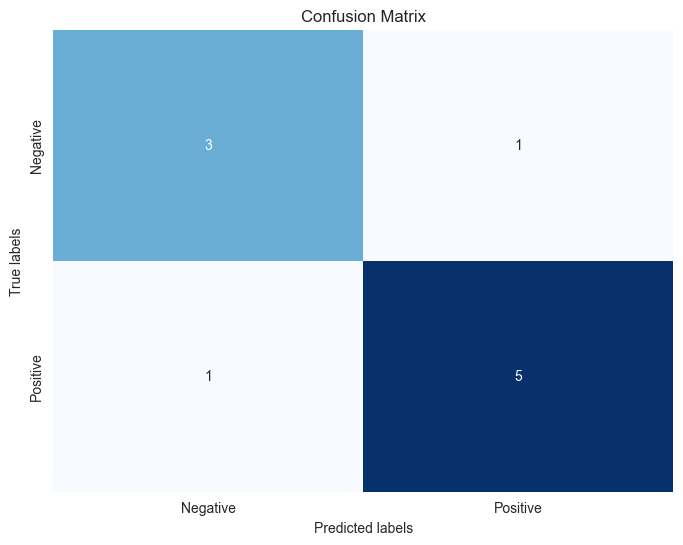

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 真实标签
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
# 模型预测的标签
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

# 创建子图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制真实标签
ax.scatter(np.arange(len(y_true)), y_true, c='b', label='True Label', marker='o', s=100)

# 绘制预测标签
ax.scatter(np.arange(len(y_pred)), y_pred, c='r', label='Predicted Label', marker='x', s=100)

# 添加标题和标签
ax.set_title('True vs Predicted Labels', fontsize=16)
ax.set_xlabel('Sample Index', fontsize=14)
ax.set_ylabel('Class', fontsize=14)

# 添加图例
ax.legend(loc='upper left', fontsize=12)

# 设置网格线
ax.grid(True, linestyle='--', alpha=0.5)

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

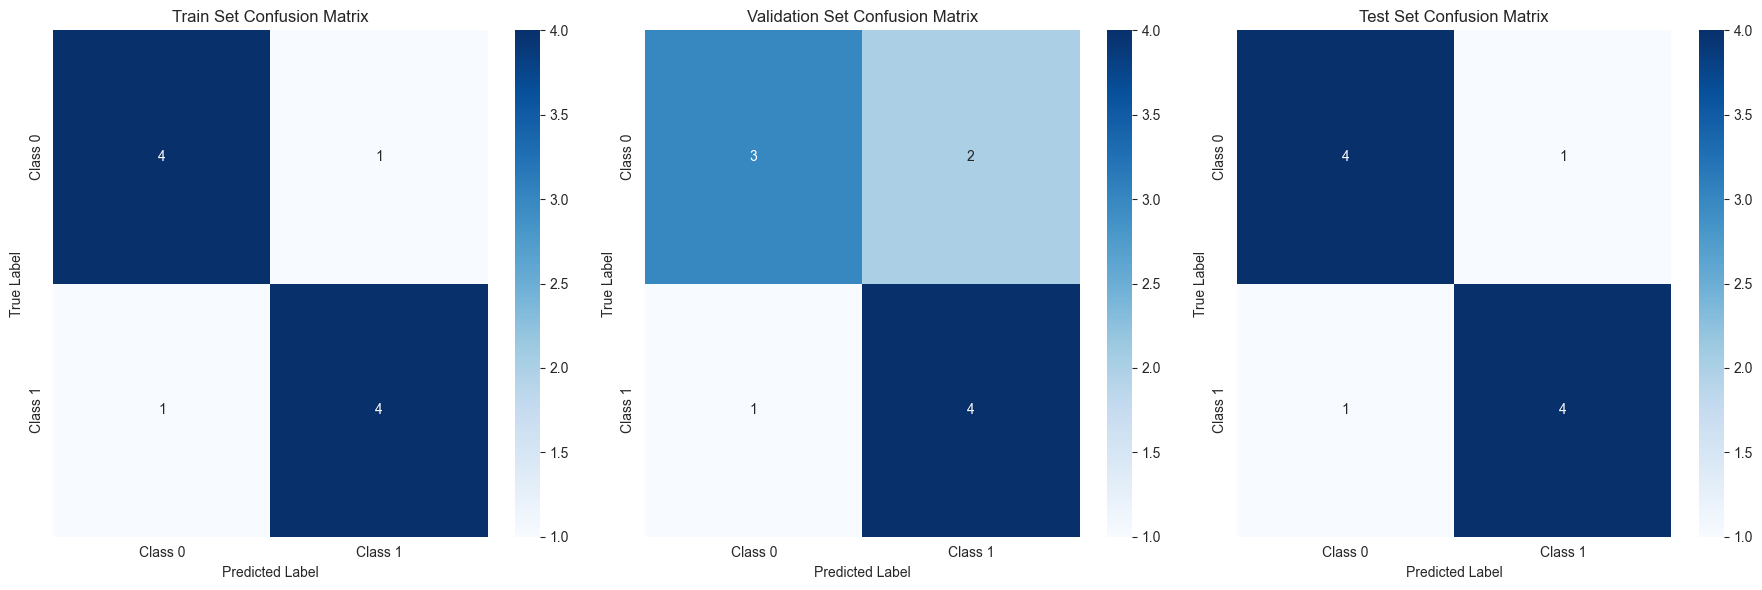

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 生成示例数据
y_train_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
y_train_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

y_val_true = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
y_val_pred = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

y_test_true = [1, 0, 0, 0, 1, 0, 1, 1, 0, 1]
y_test_pred = [1, 0, 1, 0, 0, 0, 1, 1, 0, 1]

# 计算混淆矩阵
conf_matrix_train = confusion_matrix(y_train_true, y_train_pred)
conf_matrix_val = confusion_matrix(y_val_true, y_val_pred)
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred)

# 绘制热图
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 训练集混淆矩阵
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='d', ax=axs[0], xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axs[0].set_title('Train Set Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# 验证集混淆矩阵
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues', fmt='d', ax=axs[1], xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axs[1].set_title('Validation Set Confusion Matrix')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

# 测试集混淆矩阵
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='d', ax=axs[2], xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axs[2].set_title('Test Set Confusion Matrix')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


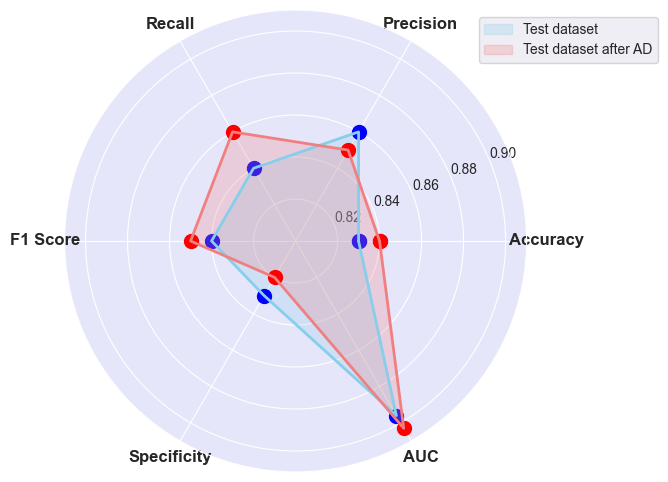

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据：用您的实际数据替换这些
labels = np.array(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'AUC'])
values1 = np.array([0.83, 0.86, 0.84, 0.84, 0.83, 0.896])
values2 = np.array([0.84, 0.85, 0.86, 0.85, 0.82, 0.903])  # 第二组数据

# 我们正在绘制的变量数。
num_vars = len(labels)

# 计算每个轴的角度。
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 该图是圆形的，所以我们需要“闭合循环”，并将起点添加到终点。
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles += angles[:1]

# 绘图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 添加填充颜色和数据线 for 第一组数据
line1, = ax.fill(angles, values1, color='skyblue', alpha=0.25)
ax.plot(angles, values1, color='skyblue', linewidth=2)

# 添加数据点 for 第一组数据
ax.scatter(angles, values1, color='blue', s=100)  # 增加数据点的大小

# 添加填充颜色和数据线 for 第二组数据
line2, = ax.fill(angles, values2, color='lightcoral', alpha=0.25)
ax.plot(angles, values2, color='lightcoral', linewidth=2)

# 添加数据点 for 第二组数据
ax.scatter(angles, values2, color='red', s=100)  # 增加数据点的大小

# 每个点的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=30, fontsize=12, weight='bold')  # 旋转标签，并设置字体大小和加粗

# 设置背景样式
ax.set_facecolor('lavender')  # 设置雷达图的背景颜色
ax.grid(True)

# 调整雷达图的轴范围
ax.set_ylim(0.8, 0.91)

# 添加图例
ax.legend([line1, line2], ['Test dataset', 'Test dataset after AD'], loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()
